# Preprocessing Penghapusan outlier

## Install pip

Perintah `!pip install pyod` digunakan untuk menginstal **PyOD** (Python Outlier Detection), yakni pustaka Python yang secara khusus ditujukan untuk mendeteksi outlier atau anomali. PyOD menyediakan lebih dari 30 algoritma populer, seperti Isolation Forest, Local Outlier Factor (LOF), Angle-based Outlier Detection (ABOD), kNN, PCA, hingga One-Class SVM, yang membantu peneliti maupun praktisi data dalam menemukan data yang menyimpang dari pola normal. Setelah diinstal, pustaka ini dapat langsung digunakan di Jupyter Notebook atau Google Colab untuk keperluan preprocessing maupun analisis berbasis deteksi anomali.


In [ ]:
!pip install pyod


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.3/46.3 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 200.6/200.6 kB 8.3 MB/s eta 0:00:00


In [ ]:
!pip install pycaret[full]


Perintah !pip install pycaret[full] berfungsi untuk menginstal PyCaret beserta seluruh dependensi pendukungnya secara lengkap. Simbol ! menunjukkan bahwa perintah tersebut dijalankan di Jupyter Notebook atau Google Colab, sedangkan pip install digunakan untuk mengunduh serta memasang paket dari PyPI. PyCaret merupakan pustaka low-code machine learning yang memudahkan alur kerja dari awal hingga akhir, mulai dari preprocessing, pelatihan, tuning, sampai deployment model. Dengan menambahkan opsi [full], semua modul tambahan—seperti NLP, time series, deteksi anomali, interpretasi model, plotting, hingga koneksi ke database—akan ikut terinstal, sehingga PyCaret dapat dimanfaatkan secara lebih lengkap dibandingkan instalasi standar.

## Preprocessing outlier menggunakan 3 metode

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.abod import ABOD

# === Load Dataset Iris ===
iris = load_iris(as_frame=True)
df = iris.frame.drop(columns=["target"])  # hanya feature
print("Dataset awal:", df.shape)

# === Fungsi Hapus Outlier ===
def hapus_outlier(data, metode="iforest", contamination=0.05):
    """
    Hapus outlier dari dataset menggunakan:
    - iforest : Isolation Forest
    - lof     : Local Outlier Factor
    - abod    : Angle-Based Outlier Detection
    """
    if metode == "iforest":
        detector = IForest(contamination=contamination, random_state=42)
    elif metode == "lof":
        detector = LOF(contamination=contamination)
    elif metode == "abod":
        detector = ABOD(contamination=contamination)
    else:
        raise ValueError("Metode tidak dikenali. Pilih: iforest, lof, abod")

    # Fit model
    detector.fit(data)
    y_pred = detector.labels_  # 0 = inlier, 1 = outlier

    # Hapus outlier
    data_clean = data[y_pred == 0]

    return data_clean, y_pred

# === Coba dengan 3 metode ===
for metode in ["iforest", "lof", "abod"]:
    clean_df, labels = hapus_outlier(df, metode=metode, contamination=0.05)
    print(f"\nMetode: {metode.upper()}")
    print("Jumlah data awal :", df.shape[0])
    print("Jumlah data bersih:", clean_df.shape[0])
    print("Jumlah outlier   :", sum(labels))


Dataset awal: (150, 4)

Metode: IFOREST
Jumlah data awal : 150
Jumlah data bersih: 142
Jumlah outlier   : 8

Metode: LOF
Jumlah data awal : 150
Jumlah data bersih: 142
Jumlah outlier   : 8

Metode: ABOD
Jumlah data awal : 150
Jumlah data bersih: 142
Jumlah outlier   : 8


Penjelasan kode tersebut adalah bahwa ia memanfaatkan **dataset Iris** untuk mendeteksi sekaligus menghapus outlier menggunakan tiga metode berbeda dari pustaka PyOD. Pertama, data Iris dimuat melalui `load_iris` dari scikit-learn, lalu hanya bagian fitur numeriknya yang digunakan (tanpa kolom target). Setelah itu dibuat fungsi `hapus_outlier()` yang menerima data beserta parameter metode. Fungsi ini mendukung tiga algoritma: **Isolation Forest (iforest)** yang mencari outlier dengan membagi data secara acak menggunakan pohon, **Local Outlier Factor (lof)** yang mengevaluasi kepadatan lokal untuk menemukan titik yang terisolasi, serta **Angle-Based Outlier Detection (abod)** yang mengidentifikasi outlier berdasarkan variasi sudut antar data.

Setelah algoritma dipilih sesuai metode, fungsi melatih model (fit) kemudian menghasilkan label prediksi (`labels_`), di mana nilai `0` berarti data normal (inlier) dan `1` berarti data menyimpang (outlier). Data dengan label outlier kemudian dihapus sehingga tersisa dataset yang lebih bersih (`data_clean`). Pada bagian akhir, fungsi tersebut dijalankan dengan ketiga metode dan ditampilkan ringkasan berisi jumlah data awal, jumlah data yang tersisa setelah pembersihan, serta total outlier yang terdeteksi. Dengan langkah ini, kita dapat langsung melihat perbandingan jumlah data yang dianggap menyimpang oleh masing-masing algoritma.

## Visualisasi hasil data

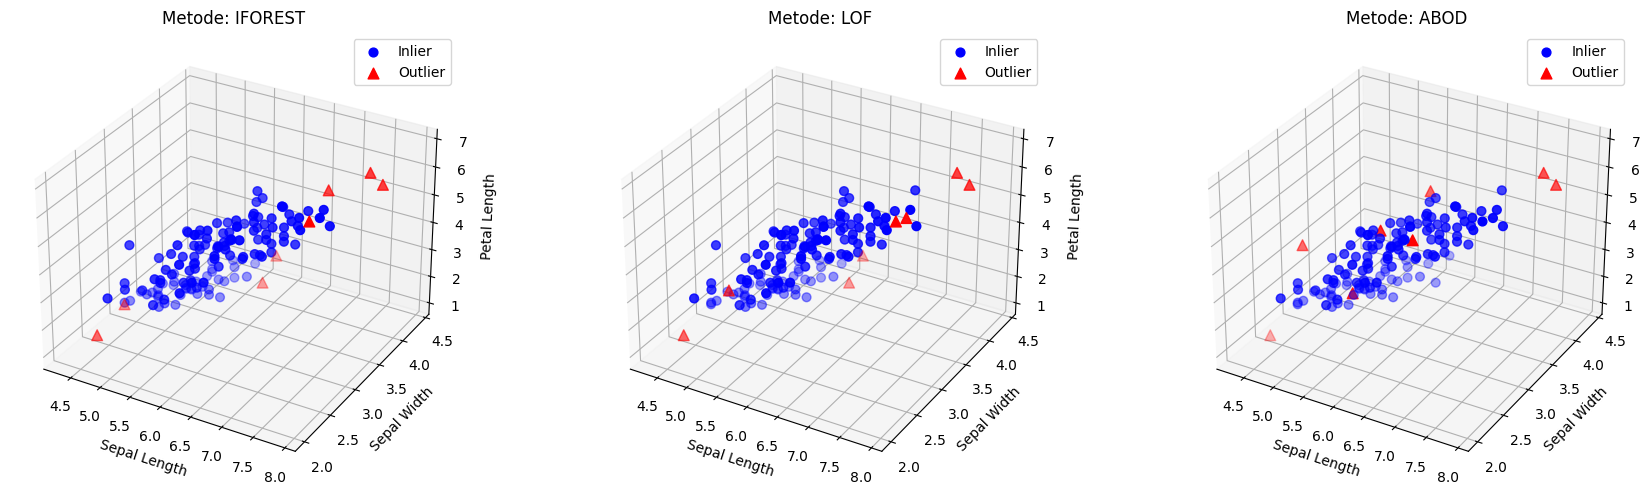

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import load_iris
from pyod.models.iforest import IForest
from pyod.models.lof import LOF
from pyod.models.abod import ABOD

# === Load Dataset Iris ===
iris = load_iris(as_frame=True)
df = iris.frame.drop(columns=["target"])  # hanya features

# === Fungsi Hapus Outlier ===
def hapus_outlier(data, metode="iforest", contamination=0.05):
    if metode == "iforest":
        detector = IForest(contamination=contamination, random_state=42)
    elif metode == "lof":
        detector = LOF(contamination=contamination)
    elif metode == "abod":
        detector = ABOD(contamination=contamination)
    else:
        raise ValueError("Metode tidak dikenali. Pilih: iforest, lof, abod")

    detector.fit(data)
    y_pred = detector.labels_  # 0=inlier, 1=outlier
    return y_pred

# === Plot 3D hasil dari 3 metode ===
fig = plt.figure(figsize=(18, 5))
metode_list = ["iforest", "lof", "abod"]

for i, metode in enumerate(metode_list, 1):
    labels = hapus_outlier(df, metode=metode, contamination=0.05)

    ax = fig.add_subplot(1, 3, i, projection='3d')
    ax.set_title(f"Metode: {metode.upper()}")

    # Plot inlier
    inliers = df[labels == 0]
    ax.scatter(inliers.iloc[:, 0], inliers.iloc[:, 1], inliers.iloc[:, 2],
               c="blue", marker="o", s=40, label="Inlier")

    # Plot outlier
    outliers = df[labels == 1]
    ax.scatter(outliers.iloc[:, 0], outliers.iloc[:, 1], outliers.iloc[:, 2],
               c="red", marker="^", s=60, label="Outlier")

    ax.set_xlabel("Sepal Length")
    ax.set_ylabel("Sepal Width")
    ax.set_zlabel("Petal Length")
    ax.legend()

plt.tight_layout()
plt.show()


Penjelasan kode tersebut adalah bahwa ia digunakan untuk memvisualisasikan hasil deteksi outlier pada dataset Iris dengan tiga algoritma berbeda: Isolation Forest (iforest), Local Outlier Factor (lof), dan Angle-Based Outlier Detection (abod). Pertama, dataset Iris dimuat menggunakan load_iris, lalu hanya fitur numeriknya yang dipakai untuk analisis. Selanjutnya, dibuat fungsi hapus_outlier() yang menerima data serta metode deteksi outlier yang diinginkan. Setelah model dipilih, data dilatih (fit) dan label prediksi (labels_) dihasilkan, di mana nilai 0 menunjukkan data normal (inlier) dan 1 menandakan data yang menyimpang (outlier).

Pada bagian akhir, kode membuat tiga subplot 3D dengan matplotlib untuk memperlihatkan hasil dari masing-masing metode secara berdampingan. Tiga fitur dijadikan sumbu plot: Sepal Length, Sepal Width, dan Petal Length. Titik yang terklasifikasi normal divisualisasikan dengan marker biru berbentuk lingkaran (o), sedangkan data yang terdeteksi sebagai outlier digambarkan dengan simbol segitiga merah (^). Dengan visualisasi ini, kita bisa langsung membandingkan bagaimana setiap algoritma mendeteksi outlier pada dimensi tiga dataset Iris.